In [15]:
# We don't ctually use most of these packages

import nltk, re, pprint
from itertools import groupby
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# This is the 10-K Lexicon that we need
wordDict = pd.read_csv('LoughranMcDonald_MasterDictionary_2014.csv')

In [17]:
# There are a lot of columns that we don't use.
wordDict.drop(['Source', 'Syllables', 'Harvard_IV', 'Irr_Verb', 'Word Count', 'Word Proportion',
               'Average Proportion', 'Std Dev', 'Doc Count', 'Sequence Number', 'Modal'], axis = 1, inplace=True)

In [18]:
filing = open('Sample 10-k.txt', encoding='utf8') # This is the string version.

In [19]:
filing = filing.read()

In [20]:
x = word_tokenize(filing) # Okay, now we have a list of each word...

In [21]:
x.sort() # Okay, now we are sorted

In [22]:
# counts is a list of the counts of each element of x (only when x is sorted!)
counts = [len(list(group)) for key, group in groupby(x)]

In [23]:
s = set(x)

In [24]:
s = sorted(s)

In [25]:
# create a df of each word (token) and the number of times it appears
filedf = pd.DataFrame(data = [s, counts])
filedf = filedf.T # we have to Transpose
filedf.columns = ['Word', 'count']

In [26]:
# merge the wordDict and filedf so we only have a df of the words that appear in our lexicon
df = pd.merge(wordDict, filedf, on = 'Word')

In [27]:
df.head()

,Word,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,count
0,ability,0,0,0,0,0,0,0,38
1,able,0,2009,0,0,0,0,0,15
2,about,0,0,0,0,0,0,0,15
3,above,0,0,0,0,0,0,0,9
4,abroad,0,0,0,0,0,0,0,1


Things are looking better, but we still have values in our DF with no sentiment value... IE 'and'.

In [30]:
# This should do the trick
df = df[(df['Positive'] + df['Negative'] + df['Uncertainty'] + df['Litigious'] + df['Constraining'] + df['Superfluous']
          + df['Interesting'] >= 1)]

In [31]:
# Initially, the values in the sentiment columns are the year in which they were added to the lexicon
# Let's replace these values with 1
df.loc[df['Negative'] != 0, 'Negative'] = 1
df.loc[df['Positive'] != 0, 'Positive'] = 1
df.loc[df['Uncertainty'] != 0, 'Uncertainty'] = 1
df.loc[df['Litigious'] != 0, 'Litigious'] = 1
df.loc[df['Constraining'] != 0, 'Constraining'] = 1
df.loc[df['Superfluous'] != 0, 'Superfluous'] = 1
df.loc[df['Interesting'] != 0, 'Interesting'] = 1

Maybe now instead of replacing the year values with 1, we need to weight each value...Example we have 7 values... We could create some kind of range that would allow for an index vaue of sentiment. Where do these values rank on the sentiment range?

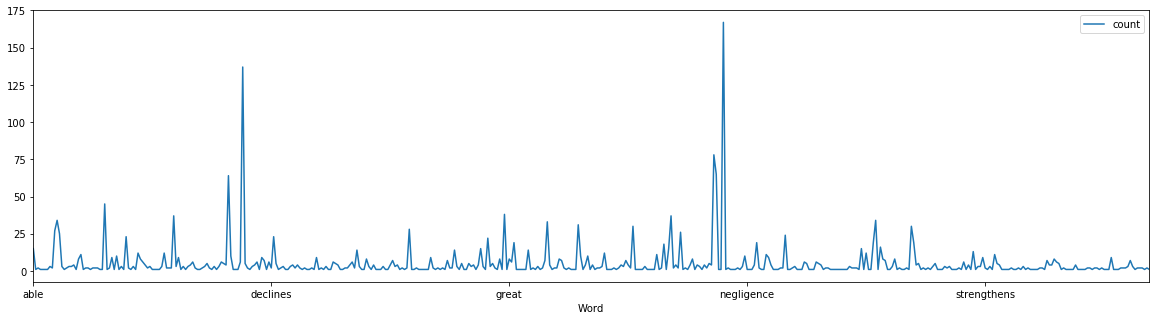

In [37]:
# sentiment words and their frquency
df.plot(x='Word',y='count', figsize=(20, 5))

In [35]:
df['count'].max()

167

In [38]:
# Interesting, the most common word is 'may'. It appears 167 times and has a sentiment rating of "uncertainty"
df[(df['count'] == 167)]

,Word,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,count
1649,may,0,0,1,0,0,0,0,167


Next step: Create some kind of 'sentiment scale'... Example: Negative = -1, Uncertainty = 0, Litigious = -0.5, Constaining = -0.5, Superfluous = 0.5, Interesting = 0.5, Positive = 1. Then multiple these values by the count of that particular word, then normalize. That way we get some value between -1 and 1, with 1 being a positive sentiment value and -1 being a negative sentiment value.